## 💰 Sistema Bancário com Inteligência Financeira - Python

Este projeto simula um sistema bancário simples com funcionalidades modernas, como análise de gastos, previsão de saldo, sugestões de investimento, alertas inteligentes e inteligência adicional para auxiliar no controle financeiro.
Uma solução moderna com análise financeira, gráficos sofisticados e assistência inteligente"

---

### 📌 Funcionalidades:
✅ Gestão de transações bancárias (depósito, saque e extrato bancário)  
✅ Análise de gastos com categorias  
✅ Sugestão de investimentos personalizados  
✅ Gráficos interativos e animações  
✅ Previsão de saldo baseada em movimentações anteriores  
✅ Alertas financeiros inteligentes  


**Funcionalidades principais:**
- Gestão de transações bancárias (depósitos, saques, extrato)
- Visualização gráfica das movimentações
- Análises inteligentes de comportamento financeiro
- Sugestões personalizadas de economia e investimento
- Design visual com identidade bancária sofisticada

In [ ]:
# Inicialização de variáveis principais
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

## 📋 Menu de Operações Bancárias Básicas

In [13]:
saldo = 0
limite = 500
extrato = []
numero_saques = 0
LIMITE_SAQUES = 3
movimentacoes = []

menu = """\n
🔹 [d] Depositar
🔹 [s] Sacar
🔹 [e] Extrato
🔹 [q] Sair

=> """

while True:
    opcao = input(menu)

    if opcao == "d":
        valor = float(input("Informe o valor do depósito: R$ "))
        categoria = input("Informe a categoria do depósito: ")

        if valor > 0:
            saldo += valor
            extrato.append(f"Depósito: R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': valor, 'Tipo': 'Depósito', 'Categoria': categoria})
            print("✅ Depósito realizado com sucesso.")
        else:
            print("❌ Valor inválido para depósito.")

    elif opcao == "s":
        valor = float(input("Informe o valor do saque: R$ "))
        categoria = input("Informe a categoria do saque: ")

        excedeu_saldo = valor > saldo
        excedeu_limite = valor > limite
        excedeu_saques = numero_saques >= LIMITE_SAQUES

        if excedeu_saldo:
            print("❌ Saldo insuficiente.")
        elif excedeu_limite:
            print("❌ Valor excede o limite de R$ 500.00.")
        elif excedeu_saques:
            print("❌ Limite de saques diários atingido.")
        elif valor > 0:
            saldo -= valor
            extrato.append(f"Saque:    R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': -valor, 'Tipo': 'Saque', 'Categoria': categoria})
            numero_saques += 1
            print("✅ Saque realizado com sucesso.")
        else:
            print("❌ Valor inválido para saque.")

    elif opcao == "e":
        HEADER = "\033[95m"
        OKGREEN = "\033[92m"
        FAIL = "\033[91m"
        OKBLUE = "\033[94m"
        WARNING = "\033[93m"
        ENDC = "\033[0m"
        BOLD = "\033[1m"

        print("\n" + HEADER + "="*30 + ENDC)
        print(BOLD + "       EXTRATO BANCÁRIO" + ENDC)
        print(HEADER + "="*30 + ENDC)
        if not extrato:
            print(WARNING + "Não foram realizadas movimentações." + ENDC)
        else:
            for item in extrato:
                if "Depósito" in item:
                    print(OKGREEN + item + ENDC)
                elif "Saque" in item:
                    print(FAIL + item + ENDC)
                else:
                    print(item)
        print(OKBLUE + "-"*30 + ENDC)
        print(BOLD + f"Saldo atual |  R$ {saldo:10.2f}" + ENDC)
        print(HEADER + "="*30 + ENDC)

    elif opcao == "q":
        print("👋 Saindo do sistema.")
        break

    else:
        print("\033[91m❌ Opção inválida.\033[0m")


👋 Saindo do sistema.


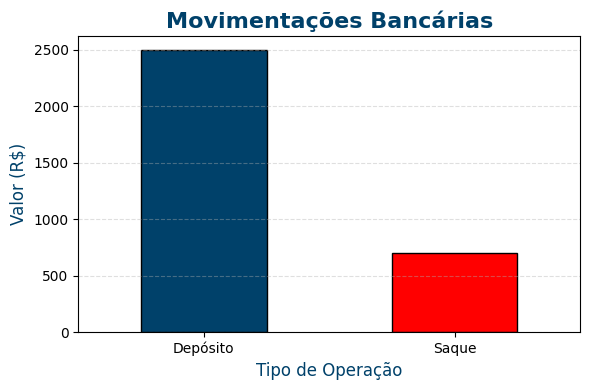

In [14]:
import matplotlib.pyplot as plt

# Paleta sofisticada: azul escuro e dourado
cores = ["#00416A", "#FF0000"]

# Dados simulados de transações
transacoes = [
    {"tipo": "Depósito", "valor": 1800},
    {"tipo": "Saque", "valor": 500},
    {"tipo": "Depósito", "valor": 700},
    {"tipo": "Saque", "valor": 200}
]

# Criando DataFrame
df = pd.DataFrame(transacoes)

# Gráfico de Barras: Total por tipo de transação
plt.figure(figsize=(6, 4))
df.groupby("tipo")["valor"].sum().plot(kind="bar", color=cores, edgecolor="black")

plt.title("Movimentações Bancárias", fontsize=16, fontweight="bold", color="#00416A")
plt.xlabel("Tipo de Operação", fontsize=12, color="#00416A")
plt.ylabel("Valor (R$)", fontsize=12, color="#00416A")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

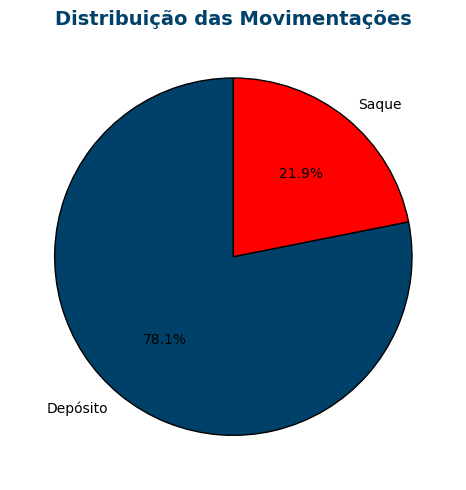

In [15]:
# Gráfico de pizza para proporção entre depósitos e saques
valores = df.groupby("tipo")["valor"].sum()

cores_premium = ["#00416A", "#FF0000"]  # Azul escuro e dourado

plt.figure(figsize=(5, 5))
plt.pie(
    valores,
    labels=valores.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=cores_premium,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Distribuição das Movimentações", fontsize=14, fontweight="bold", color="#00416A")
plt.tight_layout()
plt.show()

In [16]:
# Criando sugestões com base no comportamento de transações
total_depositos = df[df["tipo"] == "Depósito"]["valor"].sum()
total_saques = df[df["tipo"] == "Saque"]["valor"].sum()
saldo_atual = total_depositos - total_saques

print("🧠 Assistente Financeiro")
print("-" * 30)

# Sugestões de economia
if total_saques > total_depositos * 0.6:
    print("⚠️ Você está gastando mais de 60% do que deposita. Considere rever seus gastos.")
else:
    print("✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.")

# Sugestão de meta
meta_economia = saldo_atual * 0.2
print(f"🎯 Sugestão: reserve pelo menos R$ {meta_economia:.2f} como meta de economia futura.")

# Simulação de investimento simples
rentabilidade_mensal = 0.008  # Exemplo: 0.8% ao mês (CDB, Tesouro Selic...)
valor_investido = saldo_atual * 0.3
rendimento_estimado = valor_investido * rentabilidade_mensal

print(f"📈 Se investir R$ {valor_investido:.2f}, você pode ganhar cerca de R$ {rendimento_estimado:.2f} por mês.")

🧠 Assistente Financeiro
------------------------------
✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.
🎯 Sugestão: reserve pelo menos R$ 360.00 como meta de economia futura.
📈 Se investir R$ 540.00, você pode ganhar cerca de R$ 4.32 por mês.


In [21]:
df = pd.DataFrame(movimentacoes)
df['Data'] = pd.to_datetime(df['Data'])
gastos = df[df['Tipo'] == 'Saque']
categoria_gastos = gastos.groupby('Categoria')['Valor'].sum().sort_values()

fig = px.bar(categoria_gastos, 
             x=categoria_gastos.values, 
             y=categoria_gastos.index, 
             orientation='h',
             title="💸 Gastos por Categoria", 
             labels={'x': 'Total Gasto (R$)', 'y': 'Categoria'})

fig.show()

## 📊 Análise de Gastos por Categoria

In [20]:
import pandas as pd
import plotly.express as px

# Simulando movimentações
movimentacoes = [
    {"Data": "2025-06-01", "Tipo": "Depósito", "Valor": 1500.00, "Categoria": "Salário"},
    {"Data": "2025-06-02", "Tipo": "Saque", "Valor": 200.00, "Categoria": "Alimentação"},
    {"Data": "2025-06-03", "Tipo": "Saque", "Valor": 100.00, "Categoria": "Transporte"},
    {"Data": "2025-06-04", "Tipo": "Saque", "Valor": 300.00, "Categoria": "Lazer"},
    {"Data": "2025-06-05", "Tipo": "Saque", "Valor": 120.00, "Categoria": "Alimentação"},
]

# Transformando em DataFrame
df = pd.DataFrame(movimentacoes)
df['Data'] = pd.to_datetime(df['Data'])

# Filtrando saques e agrupando por categoria
gastos = df[df['Tipo'] == 'Saque']
categoria_gastos = gastos.groupby('Categoria')['Valor'].sum().sort_values()

# Gráfico interativo
fig = px.bar(categoria_gastos, 
             x=categoria_gastos.values, 
             y=categoria_gastos.index, 
             orientation='h',
             title="💸 Gastos por Categoria", 
             labels={'x': 'Total Gasto (R$)', 'y': 'Categoria'})

# Exibe o gráfico ao final
fig.show()




## ⏳ Gráficos Temporais e Animações de Despesas

In [22]:
df['AnoMes'] = df['Data'].dt.to_period('M').astype(str)
fig = px.bar(df[df['Tipo'] == 'Saque'], x='Categoria', y='Valor', animation_frame='AnoMes',
             title='📅 Gastos por Categoria ao Longo do Tempo', color='Categoria')
fig.show()

## 📈 Previsão de Saldo com Regressão Linear

In [23]:
df['Dia'] = (df['Data'] - df['Data'].min()).dt.days
df['SaldoAcumulado'] = df['Valor'].cumsum()
modelo = LinearRegression()
modelo.fit(df[['Dia']], df[['SaldoAcumulado']])

dias_futuros = pd.DataFrame({'Dia': np.arange(df['Dia'].max()+1, df['Dia'].max()+31)})
dias_futuros['PrevisaoSaldo'] = modelo.predict(dias_futuros[['Dia']])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Data'], y=df['SaldoAcumulado'], mode='lines+markers', name='Saldo Histórico'))
futuras_datas = [df['Data'].max() + timedelta(days=i) for i in range(1, 31)]
fig.add_trace(go.Scatter(x=futuras_datas, y=dias_futuros['PrevisaoSaldo'].flatten(), mode='lines', name='Previsão de Saldo'))
fig.update_layout(title='📊 Previsão de Saldo para os Próximos 30 Dias')
fig.show()

AttributeError: 'Series' object has no attribute 'flatten'

## 💡 Sugestão de Investimentos

In [25]:
saldo_atual = df['Valor'].sum()
if saldo_atual > 1000:
    print("✅ Sugerimos dividir seu saldo da seguinte forma:")
    print("- 40% em Tesouro Direto ou CDB")
    print("- 30% em Fundos Multimercado")
    print("- 30% em Ações ou ETFs")
else:
    print("⚠️ Saldo baixo. Recomendamos focar em redução de despesas.")

✅ Sugerimos dividir seu saldo da seguinte forma:
- 40% em Tesouro Direto ou CDB
- 30% em Fundos Multimercado
- 30% em Ações ou ETFs


## 🚨 Alertas Financeiros Inteligentes

In [26]:
gasto_mensal = gastos[gastos['Data'].dt.month == datetime.today().month]['Valor'].sum()
limite_gastos = -3000

if gasto_mensal < limite_gastos:
    print(f"🚨 ALERTA: Seus gastos do mês já somam R$ {-gasto_mensal:.2f} e ultrapassaram o limite de R$ {-limite_gastos}.")
else:
    print(f"✅ Gastos do mês sob controle: R$ {-gasto_mensal:.2f}")

✅ Gastos do mês sob controle: R$ -720.00
